# Ames Housing ML Challenge


Laura Elliott
group SurrealEstates


In [29]:
###### Importing data and loading packages

import pandas as pd
import numpy as np

import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 
%matplotlib inline

from sklearn.linear_model import LinearRegression, HuberRegressor


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
### Reference
#https://www.kaggle.com/vikassingh1996/
#comprehensive-data-preprocessing-and-modeling

# 1. EDA

In [ ]:
### Checking Dimensions of datasets

print('Dimensions of train data:', train.shape)
print('Dimensions of test data:', test.shape)

### Looking at the column values in the train dataset

In [ ]:
train.columns.values


## Exploring Relationships

### Correlation heatmap for all Continuous variables

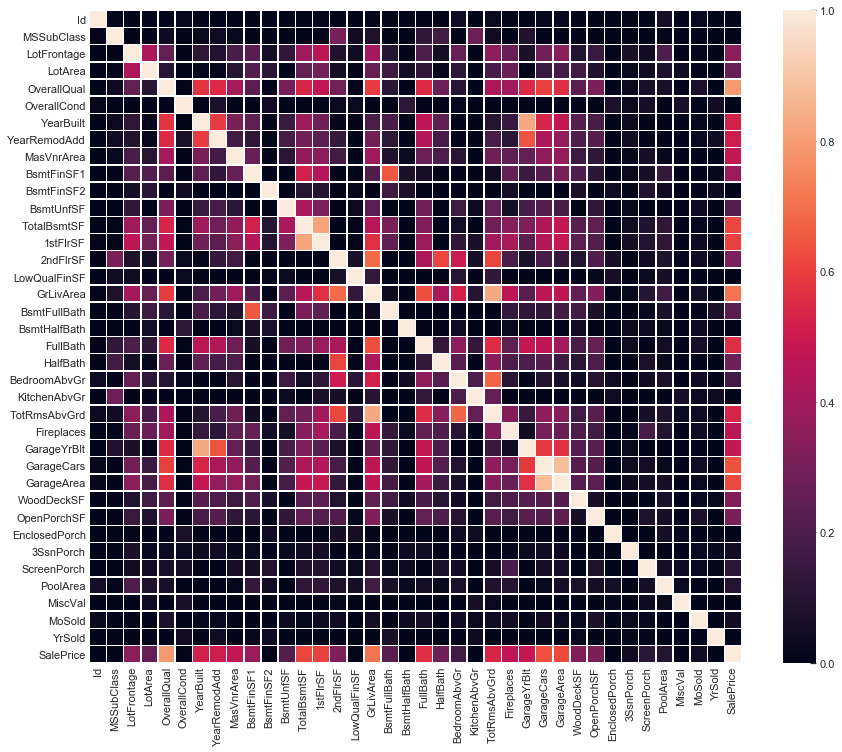

In [30]:
corr = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

###  Top 10 Correlations

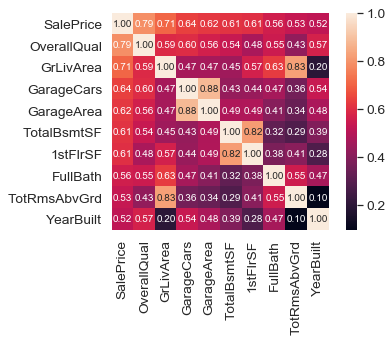

In [31]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


#### Highest Correlations seem to be: 
   - Overall Quality
   - Great Living Area
   - Garage Cars
   - Garage Area
   - Total Basement SF
   - First Floor SF
   - Full Bathrooms
   - Total Rooms above ground
   - Year Built

# Linearity and Remove Outliers

#### 1stFlrSF vs. Sale Price

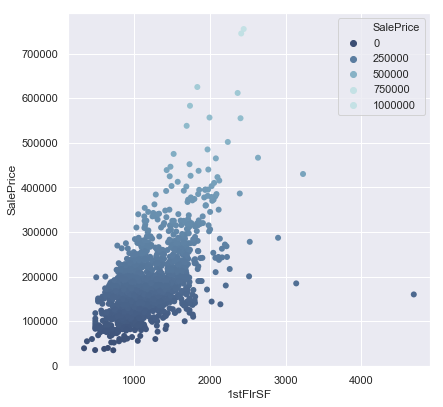

In [21]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="1stFlrSF", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [ ]:
threshold = 2000

train = train[train.loc[:,'1stFlrSF'] < threshold]


##### GrLivArea vs. Sale Price

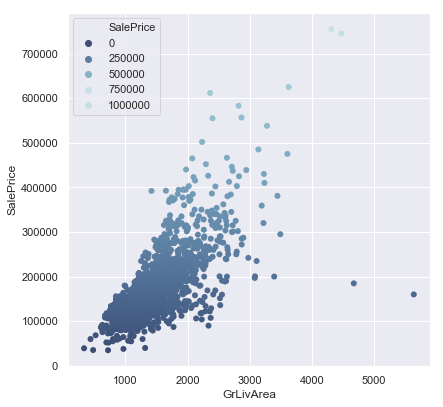

In [19]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="GrLivArea", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [ ]:
threshold = 2500

train = train[train.loc[:,'GrLivArea'] < threshold]




##### Garage Area vs. SalePrice

There was a very large number of 0 observations, Meaning that there is no garage. I eliminated these because they do neither add nor subtract anything from the analysis.

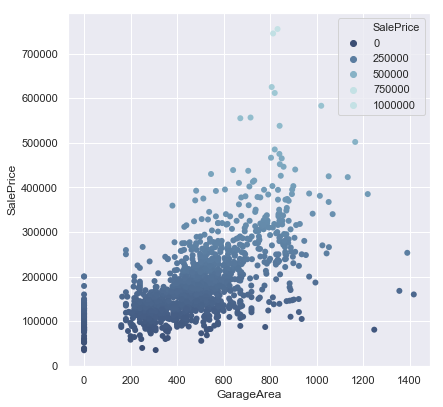

In [22]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="GarageArea", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [ ]:
threshold = 1000

train = train[train.loc[:,'GarageArea'] < threshold]

##### Total Basement SF vs. SalePrice

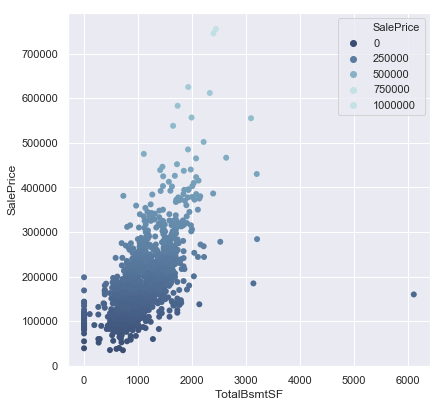

In [23]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="TotalBsmtSF", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [ ]:
threshold = 2000

train = train[train.loc[:,'TotalBsmtSF'] < threshold]


##### Total Rooms Above Ground vs. SalePrice

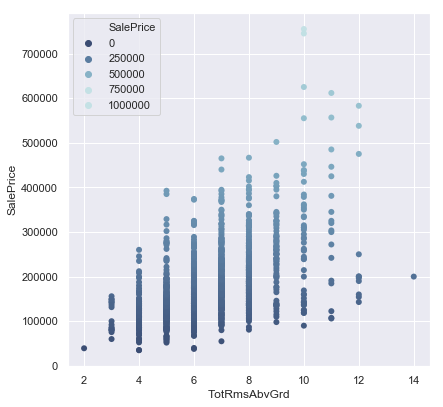

In [25]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="TotRmsAbvGrd", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [ ]:
threshold = 14

train = train[train.loc[:,'TotRmsAbvGrd'] < threshold]

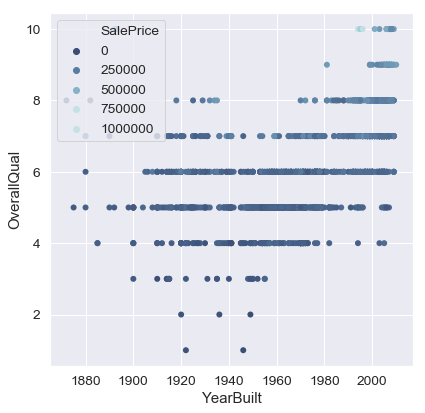

In [36]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="YearBuilt", y="OverallQual",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

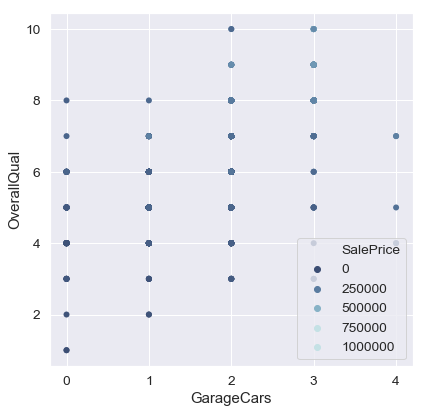

In [37]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="GarageCars", y="OverallQual",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

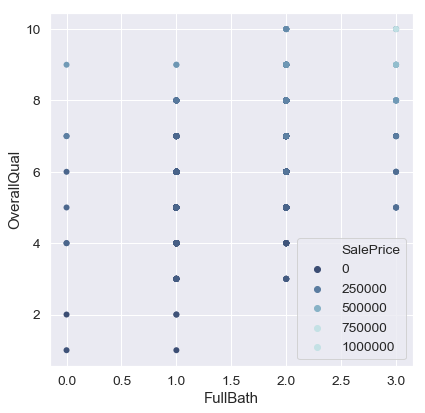

In [38]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="FullBath", y="OverallQual",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

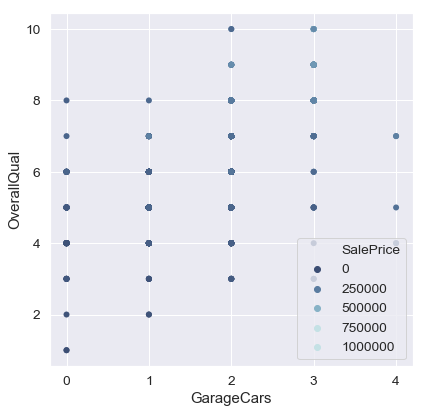

In [39]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="GarageCars", y="OverallQual",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

## 2. Missing Variables

In [ ]:
###### Combining Data
ntrain = train.shape[0]
ntest = test.shape[0]

housing_merge = pd.merge(train, test, how='outer').reset_index(drop=True)

y_sale = pd.DataFrame(train['SalePrice'])
id_temp = pd.DataFrame(housing_merge['Id'])


housing_merge.drop(['Id'], axis=1, inplace=True)
housing_merge.drop(['SalePrice'], axis=1, inplace=True)

print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
#print("Combined dataset size is : {}".format(housing_merge.shape))

In [ ]:
train.head()

In [ ]:
total = housing_merge.isna().sum()/housing_merge.isna().count()
sum=housing_merge.isna().sum()

missing=pd.concat([total,sum],axis=1,keys=['Perc','Sum']).sort_values(by='Perc',ascending=False)

colstodrop = missing[missing['Sum']>0].index

missing[missing['Sum']>0]

In [ ]:
housing_merge.drop(['PoolQC', 'FireplaceQu'], axis=1, inplace=True)

In [ ]:
housing_merge['MiscFeature'].value_counts()

#### Converting categorical variables in the merged dataset

In [ ]:
housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
             ]] = housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
                               ]].astype('object')

### Imputation

#### Imputing mode for MSZoning, Electrical, Utilites, Exterior1st/2nd, KitchenQual, Functional, SaleType, TotalSF

In [ ]:
## MSZoning
housing_merge['MSZoning']=housing_merge['MSZoning'].fillna('RL')
print('MSZoning unique Values: ', train['MSZoning'].unique())

In [ ]:
## Electrical
housing_merge['Electrical']=housing_merge['Electrical'].fillna('SBrkr')
print('Electrical unique values: ', housing_merge['Electrical'].unique())

In [ ]:
## Utilities
housing_merge['Utilities']=housing_merge['Utilities'].fillna('AllPub')
print('Utility unique values: ', housing_merge['Utilities'].unique())

In [ ]:
## Exterior1st
housing_merge['Exterior1st']=housing_merge['Exterior1st'].fillna('VinylSd')
print('Exterior1st unique values: ', housing_merge['Exterior1st'].unique())

In [ ]:
## Exterior2nd
housing_merge['Exterior2nd']=housing_merge['Exterior2nd'].fillna('VinylSd')
print('Exterior2nd unique values: ', housing_merge['Exterior2nd'].unique())

In [ ]:

## KitchenQual
housing_merge['KitchenQual']=housing_merge['KitchenQual'].fillna('TA')
print('Kitchen Quality unique values: ', housing_merge['KitchenQual'].unique())

In [ ]:
#Functional
housing_merge['Functional']=housing_merge['Functional'].fillna('Typ')
print('Functional unique values: ', housing_merge['Functional'].unique())

In [ ]:
##SaleType
housing_merge['SaleType']=housing_merge['SaleType'].fillna('WD')
print('SaleType unique values: ', housing_merge['SaleType'].unique())


  #### Imputing median for Lot Frontage,  MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, GarageArea

In [ ]:
import numpy as np
def fill_with_random(housing_merge, column):
    '''Fill `df2`'s column with name `column` with random data based on non-NaN data from `column`'''
    housing_merge['LotFrontage'] = housing_merge['LotFrontage'].apply(lambda x: np.random.choice(housing_merge['LotFrontage'].dropna().values) if np.isnan(x) else x)
    return housing_merge


In [ ]:
# LotFrontage
fill_with_random(housing_merge, housing_merge['LotFrontage'])
#.fillna(housing_merge['LotFrontage'].mean(), inplace=True)
print('LotFrontage missing:', housing_merge['LotFrontage'].isna().sum())


In [ ]:
# MasVnrArea

housing_merge['MasVnrArea'] = housing_merge['MasVnrArea'].apply(lambda x: np.random.choice(housing_merge['MasVnrArea'].dropna().values) if np.isnan(x) else x)

#housing_merge['MasVnrArea'].fillna(housing_merge['MasVnrArea'].mean(), inplace=True)
print('MasVnrArea missing:', housing_merge['MasVnrArea'].isna().sum())


In [ ]:
# BsmtFinSF1
#housing_merge['BsmtFinSF1'].fillna(housing_merge['BsmtFinSF1'].mean(), inplace=True)

housing_merge['BsmtFinSF1'] = housing_merge['BsmtFinSF1'].apply(lambda x: np.random.choice(housing_merge['BsmtFinSF1'].dropna().values) if np.isnan(x) else x)
print('BsmtFinSF1 missing:', housing_merge['BsmtFinSF1'].isna().sum())


In [ ]:
# BsmtFinSF2
#housing_merge['BsmtFinSF2'].fillna(housing_merge['BsmtFinSF2'].mean(), inplace=True)
housing_merge['BsmtFinSF2'] = housing_merge['BsmtFinSF2'].apply(lambda x: np.random.choice(housing_merge['BsmtFinSF2'].dropna().values) if np.isnan(x) else x)
print('BsmtFinSF2 missing:', housing_merge['BsmtFinSF2'].isna().sum())


In [ ]:
# BsmtUnfSF
#housing_merge['BsmtUnfSF'].fillna(housing_merge['BsmtUnfSF'].mean(), inplace=True)
housing_merge['BsmtUnfSF'] = housing_merge['BsmtUnfSF'].apply(lambda x: np.random.choice(housing_merge['BsmtUnfSF'].dropna().values) if np.isnan(x) else x)
print('BsmtunfSF missing:', housing_merge['BsmtUnfSF'].isna().sum())


In [ ]:
# TotalBasmtSF
#housing_merge['TotalBsmtSF'].fillna(housing_merge['TotalBsmtSF'].mean(), inplace=True)

housing_merge['TotalBsmtSF'] = housing_merge['TotalBsmtSF'].apply(lambda x: np.random.choice(housing_merge['TotalBsmtSF'].dropna().values) if np.isnan(x) else x)
print('TotalBsmtSF missing:', housing_merge['TotalBsmtSF'].isna().sum())



In [ ]:
# GarageArea
#housing_merge['GarageArea'].fillna(housing_merge['GarageArea'].mean(), inplace=True)

housing_merge['GarageArea'] = housing_merge['GarageArea'].apply(lambda x: np.random.choice(housing_merge['GarageArea'].dropna().values) if np.isnan(x) else x)
print('GarageArea missing:', housing_merge['GarageArea'].isna().sum())



In [ ]:
# Total Bsmt Sf
#housing_merge['TotalBsmtSF'].fillna(housing_merge['TotalBsmtSF'].mean(), inplace=True)
housing_merge['TotalBsmtSF'] = housing_merge['TotalBsmtSF'].apply(lambda x: np.random.choice(housing_merge['TotalBsmtSF'].dropna().values) if np.isnan(x) else x)
print('TotalBsmtSF missing:', housing_merge['TotalBsmtSF'].isna().sum())




#### Imputing median for Bsmt FullBath, BsmtHalfBath, GarageCars, GarageYrBlt

In [ ]:
##BedroomAbvGr
housing_merge['BedroomAbvGr'].fillna(housing_merge['BedroomAbvGr'].median(),inplace = True)
print('BedroomAbvGr missing: ', housing_merge['BedroomAbvGr'].isna().sum())

In [ ]:
# BsmtFullBath
housing_merge['BsmtFullBath'].fillna(housing_merge['BsmtFullBath'].median(), inplace=True)
print('BsmtFullBath missing:', housing_merge['BsmtFullBath'].isna().sum())



In [ ]:
#BsmtHalfBath
housing_merge['BsmtHalfBath'].fillna(housing_merge['BsmtHalfBath'].median(), inplace=True)
print('BsmtHalfBath missing:', housing_merge['BsmtHalfBath'].isna().sum())

In [ ]:
#Garage Cars
housing_merge['GarageCars'].fillna(housing_merge['GarageCars'].median(), inplace=True)
print('GarageCars missing:', housing_merge['GarageCars'].isna().sum())

In [ ]:
#GarageYrBlt
housing_merge['GarageYrBlt'].fillna(housing_merge['GarageYrBlt'].median(), inplace=True)
print('GarageYrBlt missing:', housing_merge['GarageYrBlt'].isna().sum())

In [ ]:
#Fireplaces
housing_merge['Fireplaces'].fillna(housing_merge['Fireplaces'].median(), inplace=True)
print('Fireplaces missing:', housing_merge['Fireplaces'].isna().sum())

In [ ]:
#FullBath
housing_merge['FullBath'].fillna(housing_merge['FullBath'].median(), inplace=True)
print('FullBath missing:', housing_merge['FullBath'].isna().sum())

In [ ]:
#HalfBath 
housing_merge['HalfBath'].fillna(housing_merge['HalfBath'].median(), inplace=True)
print('HalfBath  missing:', housing_merge['HalfBath'].isna().sum())

In [ ]:

#KitchenAbvGr 
housing_merge['KitchenAbvGr'].fillna(housing_merge['KitchenAbvGr'].median(), inplace=True)
print('KitchenAbvGr  missing:', housing_merge['KitchenAbvGr'].isna().sum())

In [ ]:
#MSSubClass 
housing_merge['MSSubClass'].fillna(housing_merge['MSSubClass'].median(), inplace=True)
print('MSSubClass  missing:', housing_merge['MSSubClass'].isna().sum())

In [ ]:
#MoSold 
housing_merge['MoSold'].fillna(housing_merge['MoSold'].median(), inplace=True)
print('MoSold missing:', housing_merge['MoSold'].isna().sum())

In [ ]:
#OverallCond 
housing_merge['OverallCond'].fillna(housing_merge['OverallCond'].median(), inplace=True)
print('OverallCond missing:', housing_merge['OverallCond'].isna().sum())

In [ ]:
#OverallQual
housing_merge['OverallQual'].fillna(housing_merge['OverallQual'].median(), inplace=True)
print('OverallQual missing:', housing_merge['OverallQual'].isna().sum())

In [ ]:
#YrSold
housing_merge['YrSold'].fillna(housing_merge['YrSold'].median(), inplace=True)
print('YrSold missing:', housing_merge['YrSold'].isna().sum())

In [ ]:
housing_merge.LotArea.isna().sum()

#### Imputing 'None' for missing values where NaN is meaningful, i.e. PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageCOnd, GarageFinish, GarageQual, BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1, MasVnrType

In [ ]:
impute_none = housing_merge.loc[:, [ 'MiscFeature', 'Alley', 'Fence',
                                    'GarageType', 'GarageCond','GarageFinish','GarageQual',
                                    'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1',
                                    'MasVnrType']]
for i in impute_none.columns:
    housing_merge[i].fillna('None', inplace = True)

In [ ]:
#Check
missing_columns = housing_merge.columns[housing_merge.isnull().any()].values
missing_columns = len(housing_merge) - housing_merge.loc[:, np.sum(housing_merge.isnull())>0].count()
missing_columns

In [ ]:
housing_merge.dtypes

In [ ]:
housing_merge.isna().sum()

### Creating New Features

In [ ]:
######### New Features

housing_merge['TotalSF'] = (housing_merge['BsmtFinSF1'] + housing_merge['BsmtFinSF2'] 
                           + housing_merge['1stFlrSF'] + housing_merge['2ndFlrSF'])



In [ ]:

housing_merge['TotalBathrooms'] = (housing_merge['FullBath'] + (0.5*housing_merge['HalfBath']) +
                              housing_merge['BsmtFullBath'] + (0.5*housing_merge['BsmtHalfBath']))



In [ ]:
housing_merge['TotalPorchSF'] = (housing_merge['OpenPorchSF'] + housing_merge['3SsnPorch'] +
                             housing_merge['EnclosedPorch'] + housing_merge['ScreenPorch'] +
                              housing_merge['WoodDeckSF'])

In [ ]:
housing_merge.isna().sum()

In [ ]:
corr = housing_merge.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

In [ ]:
housing_merge.drop(['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath'], axis=1, inplace=True)

In [ ]:
housing_merge.drop(['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF'], axis=1, inplace=True)

In [ ]:
housing_merge.drop(['3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF', 'OpenPorchSF'], axis=1, inplace=True)

In [ ]:
housing_merge.drop(['GarageCars'], axis=1, inplace=True)

In [ ]:
housing_merge.drop(['LotFrontage'], axis=1, inplace=True)

In [ ]:
numeric_cols = housing_merge.dtypes[housing_merge.dtypes != "object"].index

In [ ]:
categori_cols = housing_merge.dtypes[housing_merge.dtypes == object]

In [ ]:
housing_merge.shape

In [ ]:
housing_merge.MiscFeature.unique()

## 4.0 Feature Engineering

### 5.1 Scaling Numerical Features

In [ ]:
housing_merge['Pool'] = housing_merge['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['Has2flor'] = housing_merge['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasGarage'] = housing_merge['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasBsmt'] = housing_merge['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasFireplace'] = housing_merge['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)



In [ ]:
housing_merge.shape

In [ ]:
housing_merge.head()

### 5.2 Categorical Features

In [ ]:
categori_cols

#### Using Label Encoder to encode Categorical Values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import array
from numpy import argmax 


#reference:https://www.kaggle.com/erick5/predicting-house-prices-with-machine-learning

cols = ( 'BldgType', 'BsmtCond', 'BsmtExposure','Fence', 'MiscFeature', 'Alley',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType',
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities')


In [ ]:
#np.where(np.isnan(housing_merge))

In [ ]:
##### process and encode to make it easier for the machine learning algorithm
### to read cat var
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(housing_merge[c].values))
    housing_merge[c] = lbl.transform(list(housing_merge[c].values))
    
print('Shape housing_merge: {}'.format(housing_merge.shape))

In [ ]:
### hanging back to category

housing_merge[['BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities','Fence', 'MiscFeature', 'Alley']] = housing_merge[['BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd',  'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities','Fence', 'MiscFeature', 'Alley']].astype('category')


In [ ]:
housing_merge = pd.get_dummies(housing_merge, drop_first = True)

# 5.0 Checking Assumptions: Normality

In [ ]:
#### Continuous Vars

In [ ]:
num_housing_merge = housing_merge.select_dtypes(include = ['int64', 'float64'])
display(num_housing_merge.head())
display(num_housing_merge.columns.values)

In [ ]:
train_num_std = [col for col in num_housing_merge if abs(housing_merge[col].skew()) <= 1]
train_num_yjt = [col for col in num_housing_merge if abs(housing_merge[col].skew()) > 1]

In [ ]:
########### Transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

### Num
scaler = StandardScaler().fit(housing_merge[train_num_std].values)
housing_merge[train_num_std] = scaler.transform(housing_merge[train_num_std].values)

### power transform
pt = PowerTransformer().fit(housing_merge[train_num_yjt].values)
housing_merge[train_num_yjt] = pt.transform(housing_merge[train_num_yjt].values)


In [ ]:
##### Sale Price

In [ ]:
sns.distplot(y_sale['SalePrice'])

In [ ]:
y_sale = np.log1p(y_sale)

In [ ]:
sns.distplot(y_sale['SalePrice'])


## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(housing_merge)
plt.figure(figsize = (6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components', fontsize = 14)
plt.ylabel('cumulative explained variance', fontsize = 14)

plt.grid(True);

In [ ]:
x_train = pca.fit_transform(housing_merge)


In [ ]:
feature_names =[]

for i in range (100):
    
    feature_indx = np.abs(pca.components_[i]).argmax()
    feature_names.append(housing_merge.columns[feature_indx])
    
feature_dict = {'PC{}'.format(i+1):feature_names[i] for i in range(100)}
pd.DataFrame(list(feature_dict.items()), columns=['PC', 'Name']).head(25)

In [ ]:
housing_merge = pd.concat([housing_merge, id_temp], axis=1)

In [ ]:
print(housing_merge.shape)

In [ ]:
print(y_sale.shape)

### To CSV


In [ ]:
housing_train = pd.DataFrame(housing_merge.iloc[0:1353, :])
housing_test = pd.DataFrame(housing_merge.iloc[1353:,:])

y_train = pd.DataFrame( y_sale)

In [ ]:
housing_train.to_csv('housing_train.csv', index = False)
housing_test.to_csv('housing_test.csv', index = False)



y_train.to_csv('y_housing.csv', index = False)